# Summarise key measurements

To begin with we will simply plot the L_IR from CIGALE as a function of z

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))


This notebook was run with herschelhelp_internal version: 
1407877 (Mon Feb 4 12:56:29 2019 +0000)


In [2]:
import pyvo as vo
import glob
import time
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import random

import herschelhelp as hh
from herschelhelp_internal.utils import flux_to_mag

from astropy.table import Table, Column, vstack, join, unique

In [4]:
tab = Table.read('../../../dmu32/dmu32_AllSky/data/HELP_all_sky_A-list_20201111.fits')[
    'redshift',
    'cigale_dustlumin'
]

/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


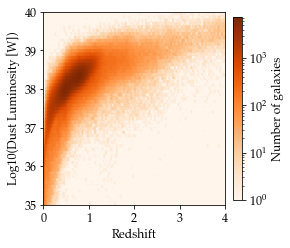

In [16]:
fig, ax = plt.subplots()
x_lims=[0.,4.]
y_lims=[35,40]
#ax.scatter(tab['redshift'], np.log10(tab['cigale_dustlumin']),s=0.01,alpha=0.1, rasterized=True)
mask = tab['redshift'] > x_lims[0]
mask &= tab['redshift'] < x_lims[1]
mask &= np.log10(tab['cigale_dustlumin']) > y_lims[0]
mask &= np.log10(tab['cigale_dustlumin']) < y_lims[1]
im = ax.hexbin(tab['redshift'][mask], np.log10(tab['cigale_dustlumin'][mask]), cmap='Oranges', bins="log")

fig.colorbar(im, ax=ax, label="Number of galaxies",fraction=0.046, pad=0.04)
#ax.axis('equal')

plt.xlim(x_lims)
plt.xlabel('Redshift')
plt.ylim(y_lims)
plt.ylabel('Log10(Dust Luminosity [W])')
#plt.yscale('log')

#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1 * column_width_cm
hieght_cm = width_cm #/ 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/redshift_cigale_dustlumin.pdf', bbox_inches='tight')
plt.savefig('./figs/redshift_cigale_dustlumin.png', bbox_inches='tight')